# Session 1: Introduction to Derivatives

## Lecture

### Clip 1: Introduction to 18.01

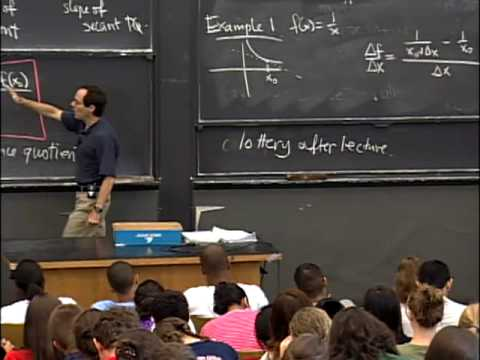

In [1]:
YouTubeVideo('7K1sB05pE0A', start=20, end=229)

[Accomanying Notes(PDF)](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/1.-differentiation/part-a-definition-and-basic-rules/session-1-introduction-to-derivatives/MIT18_01SCF10_Ses1a.pdf)

So again welcome to **18.01** (pronounce as _eighteen o one_)

We're getting started today with what we're calling **UNIT 1**, ~~a highly imaginative topic~~, uh, a highly imaginative title. And it's **DIFFERENTIATION**.

So let me first tell you briefly, what's in store in the next couple of weeks.

The main topic today is **WHAT IS A DERIVATIVE**. And we're going to look at this from several different points of view.

* And the first one is the **geom**etric **interp**retation. That's what we'll spend most of today on.

* And then, we'll also talk about **physical interp**retation of what a derivative is.

* And then there's going to be something else which I guess is maybe the reason why Calculus is so fundamental, and why we always start with it in most science and engineering schools, which is the **importance** of derivatives, of this, **to all measurements**. **(**So that means pretty much every place. That means in **sci**ence, in **eng**ineering, in **econ**omics, in **polit**ical science, etc. Polling, lots of commercial applications, just about everything.**)**

Now, so that's what we'll be getting started with, and then there's another thing that we're gonna do in this unit, which is we're going to explain how to differentiate anything. So, **HOW TO DIFFERENTIATE ANY F'N(function) YOU KNOW**.

And that's kind of a tall order, but let me just give you an example.

If you want to take the derivative - this we'll see today is the notation for the derivative of something - of some messy function like $e^{x \arctan x}$ (pronounce as _e to the x arctan of x_). We'll work this out by the end of this unit.

$$\frac{\mathrm{d}}{\mathrm{d}x} e^{x \arctan x} = ?$$

All right? Anything you can think of, anything you can write down, we can differentiate it.

All right, so that's what we're gonna do, and today, as I said, we're gonna spend most of our time on this geometric interpretation. So let's begin with that. 

### Clip 2: Geometric Interpretation of Differentiation

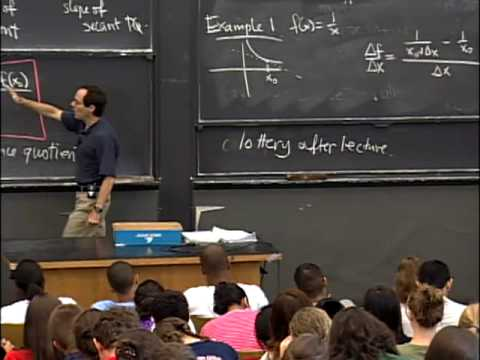

In [2]:
YouTubeVideo('7K1sB05pE0A', start=229, end=525)

[Accompanying Notes (PDF)](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/1.-differentiation/part-a-definition-and-basic-rules/session-1-introduction-to-derivatives/MIT18_01SCF10_Ses1b.pdf)

So here we go with the **GEOM**ETRIC **INTERP**RETATION of derivatives.

And, what we're going to do is just ask the geometric problem of **FIND**ING **THE TANGENT LINE TO** some graph of some function

$$y = f(x)$$

at some point. Which is to say $(x_0, y_0)$ (pronounce as x zero y zero).

$$P = (x_0, y_0)$$

So that's the problem that we're addressing here.

Alright, so here's our problem, and now let me show you the solution.

So, well, let's graph the function. Here's its graph. Here's some point.

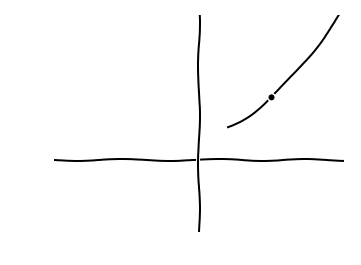

In [3]:
plot = Plot(
    plt.xkcd,
    {'font.size': 20,
     'lines.markersize': 10})

@plot
def init_ax(ax):
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_xlim(-1,1)
    ax.set_ylim(-0.5,1)
    ax.axhline(c='k')
    ax.axvline(c='k')

x = np.linspace(0.2, 1, 500)

def f(x):
    return 0.2+(x-0.1)**1.6

@plot
def draw_curve(ax, f):
    ax.plot(x, f(x), 'k')
    ax.plot(0.5, f(0.5), 'k.')

plot.show()

All right, maybe I should draw it just a bit lower. So they don't.

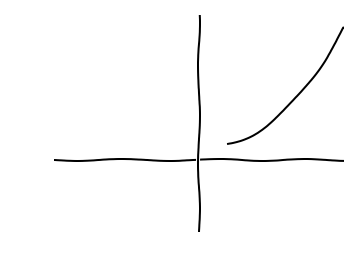

In [4]:
def f(x):
    return 0.1+(x-0.1)**2

@plot
def draw_curve(ax, f):
    ax.plot(x, f(x), 'k')

plot.show()

Alright, So here's a point $P$.

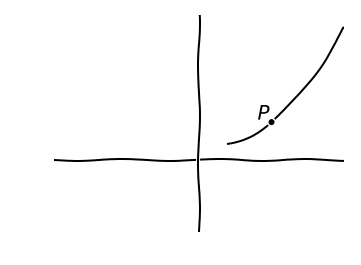

In [5]:
x0 = 0.5

@plot
def draw_p(ax, f, x0):
    ax.plot(x0, f(x0), 'k.')
    ax.text(x0, f(x0), '$P$', ha='right', va='bottom')

plot.show()

Maybe it's above the point $x_0$.

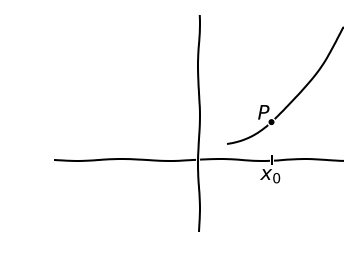

In [6]:
@plot
def draw_x0(ax, x0):
    ax.plot(x0, 0, 'k|', mew=2)
    ax.text(x0, -0.05, '$x_0$', ha='center', va='top')

plot.show()

$x_0$, by the way, this was supposed to be an $x_0$. That was some fixed place on the x-axis.

And now, in order to perform this mighty feat, I will use another color of chalk. How about red? OK. So here it is. There's the tangent line, well, not quite straight. Close enough. All right? I did it.

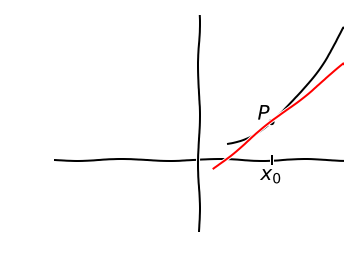

In [7]:
# https://stackoverflow.com/a/9877279
def tangent_line(f, x0):
    fp = derivative(f)
    y0 = f(x0)
    m = fp(x0)
    doc = r'\frac{\mathrm{d}y}{\mathrm{d}x}'

    def line(x):
        return y0 + m * (x - x0)
    
    line.__doc__ = f'Tangent ${doc} = {m}$'
    return line

@plot
def draw_tangent_line(ax, f, x0):
    x = linspace(0.1, 1, 500)
    ax.plot(x, tangent_line(f, x0)(x), 'r')

plot.show()

That's the geometric problem. I achieved what I wanted to do, and it's kind of an interesting question, which unfortunately I can't solve for you in this class, which is, how did I do that? That is, how physically did I manage to know what to do to draw this tangent line? But that's what geometric problems are like. We visualize it. We can figure it out somewhere in our brains. It happens.

And the task that we have now is to figure out how to do it analytically, to do it in a way that a machine could just as well as I did in drawing this tangent line.

So, what did we learn in high school about what a tangent line is? Well, a tangent line has an equation, and any line through a point has the equation y minus $y_0$ is equal to m, the slope, times x minus $x_0$.

$$y - y_0 = m (x - x_0)$$

So here's the equation for that line, and now there are two pieces of information that we're going to need to work out what the line is.

* The first one is the **point**. That's that point P there. And to specify P, given x, we need to know the level of y, which is of course just $f(x_0)$. That's not a calculus problem, but anyway that's a very important part of the process. So that's the first thing we need to know.

$$y_0 = f(x_0)$$

* And the second thing we need to know is the **slope**. And that's this number m. And in calculus we have another name for it. We call it f prime of $x_0$. Namely, the derivative of f. So that's the calculus part. That's the tricky part, and that's the part that we have to discuss now.

$$m = f'(x_0)$$

So just to make that explicit here, I'm going to make a **DEF'N**(definition), which is that $f'(x_0)$, which is known as **the derivative**, **of f at $x_0$, is the slope of the tangent line to y = f(x) at** the point, let's just call it **P**.

### Clip 3: Limit of Secants

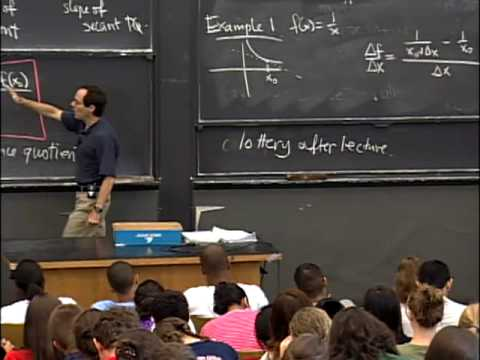

In [8]:
YouTubeVideo('7K1sB05pE0A', start=525, end=712)

[Accompanying Notes (PDF)](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/1.-differentiation/part-a-definition-and-basic-rules/session-1-introduction-to-derivatives/MIT18_01SCF10_Ses1c.pdf)

All right? So, that's what it is, but still I haven't made any progress in figuring out any better how I drew that line. So I have to say something that's more concrete, because I want to be able to cook up what these numbers are. I have to figure out what this number m is.

And one way of thinking about that, let me just try this, so I certainly am taking for granted that in sort of non-calculus part that I know what a line through a point is. So I know this equation.

But another possibility might be, you know, this line here, how do I know

well, unfortunately, I didn't draw it quite straight, but there it is

how do I know that this orange line is not a tangent line, but this other line is a tangent line?

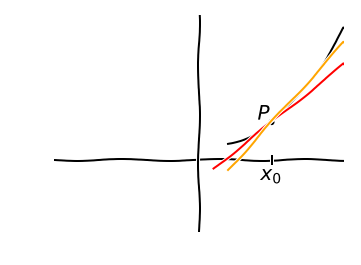

In [9]:
x1 = 0.8

def secant_line(f, x0, x1):
    y0 = f(x0)
    y1 = f(x1)
    m = (y1-y0) / (x1-x0)
    doc = r'\frac{\Delta y}{\Delta x}'
    
    def line(x):
        return y0 + m * (x-x0)
    line.__doc__ = f'Secant ${doc} = {m}$'
    return line

@plot
def draw_secant_line(ax, f, x0, x1):
    x = linspace(0.2, 1, 500)
    ax.plot(x, secant_line(f, x0, x1)(x), 'orange')

plot.show()

Well, it's actually not so obvious, and, but I'm gonna describe it a little bit. It's not really the fact, this thing crosses at some other place, which is this point Q.

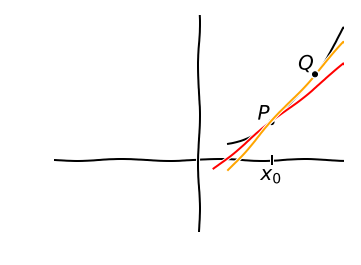

In [10]:
@plot
def draw_q(ax, f, x1):
    ax.plot(x1, f(x1), 'k.')
    ax.text(x1, f(x1), '$Q$', ha='right', va='bottom')

plot.show()

But it's not really the fact that the thing crosses at two place, because the line could be wiggly, the curve could be wiggly, and it could cross back and forth a number of times. That's not what distinguishes the tangent line.

So I'm gonna have to somehow grasp this, and I'll first do it in language. And it's the following idea:

it's that if you take this orange line, which is called a secant line,

and you think of the Q, the point Q as getting closer and closer to P,

then the slope of that line will get closer and closer to the slope of the red line.

In [11]:
interact(plot.show, x1=(x0+0.01,x0+0.5,0.05));

interactive(children=(FloatSlider(value=0.71, description='x1', max=1.0, min=0.51, step=0.05), Output()), _dom_classes=('widget-interact',))

And if we draw it close enough, then that's gonna be the correct line. So that's really what I did, sort of in my brain when I drew that first line.

And so that's the way I'm going to articulate it first. Now, so the **TANGENT LINE =**(pronounce as _is equal to_) the **LIMIT of** what so called **SECANT LINES PQ AS Q ->**(pronounce as _tends to_) **P**. And here we're thinking of **(P** as being **fixed)** and Q as variable. All right? 

So, so, that's the, Again, this is still the geometric discussion, but now we're gonna be able to put symbols and formulas to this computation. And we'll be able to work out formulas in any example.

### Clip 4: Slope as Ratio

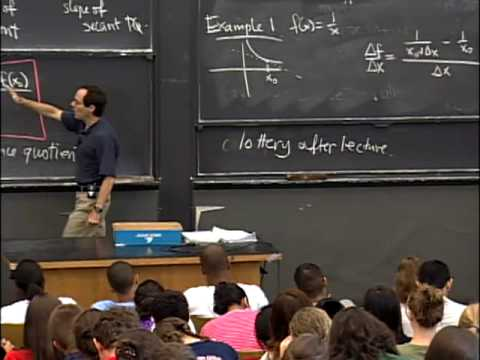

In [12]:
YouTubeVideo('7K1sB05pE0A', start=712, end=845)

[Accompanying Notes (PDF)](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/1.-differentiation/part-a-definition-and-basic-rules/session-1-introduction-to-derivatives/MIT18_01SCF10_Ses1d.pdf)

So, so let's do that. So first of all, I'm gonna write out these points P and Q again. So maybe we'll put P here and Q here. And I'm thinking of this line through them. I guess it was orange, so we'll leave it as orange.

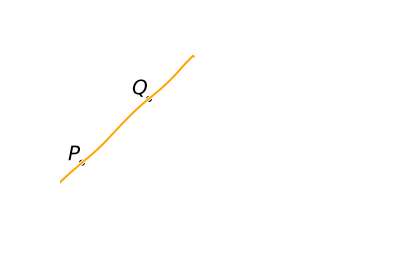

In [13]:
plot.clear()

@plot
def init_ax(ax, x0):
    ax.set_axis_off()
    ax.set_xlim(x0-0.1,x0+1.4)
    ax.set_ylim(-0.1,1.025)

plot|draw_p|draw_q|draw_secant_line
plot.show()

Right. And now I want to compute its slope. And so this, gradually, we'll do this in two steps. And these steps will introduce us to the basic notations which are used throughout calculus, including multi-variable calculus, across the board. 

So the first notation it's used is you imagine here's the x-axis underneath, and here's the $x_0$, the location directly below the point P.

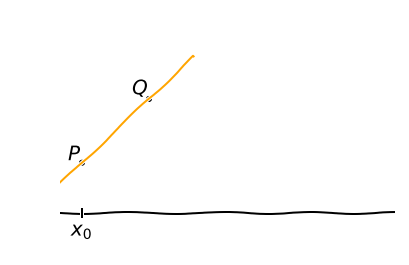

In [14]:
@plot
def draw_x_axis(ax):
    ax.axhline(c='k')

plot|draw_x0

plot.show()

And we're traveling here a horizontal distance which is denoted by $\Delta x$. So that's **"delta x"**, so called. And we could also call it the **change in x**.

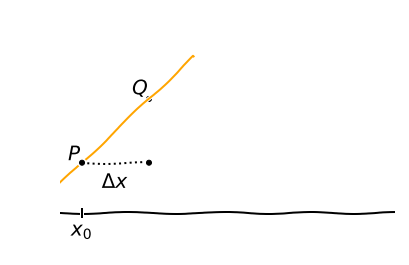

In [15]:
@plot
def draw_delta_x(ax, f, x0, x1):
    y = f(x0)
    ax.plot([x0, x1], [y,y], 'k.:')
    ax.text((x0+x1)/2, y-0.05, '$\Delta x$', ha='center', va='top')

plot.show()

Alright, so that's one thing we want to measure in order to get the slope of this line PQ.

And the other thing is this height. So that's this distance here, which we denote delta f, which is the change in f.

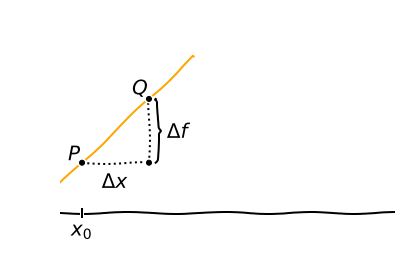

In [16]:
@plot
def draw_delta_f(ax, f, x0, x1):
    y0 = f(x0)
    y1 = f(x1)
    ax.plot([x1, x1], [y0,y1], 'k.:')
    ax.text(x1+0.08, (y0+y1)/2, '$\Delta f$', ha='left', va='center')
    
    y, x = full_brace(y0, y1)
    ax.plot(x+x1+0.02, y, 'k')

plot.show()

And then, the slope is just the ratio, $\frac{\Delta f}{\Delta x}$(pronounce as _delta f over delta x_). So this is the **slope of** the **secant (PQ)**.

And the process I just described over here with this limit applies not just to the whole line itself, but also in particular to its slope.

And the way we write that is the limit as delta x goes to 0. And that's going to be our slope.

$$m = \lim_{\Delta x \to 0} \frac{\Delta f}{\Delta x}$$

So this is the **slope of** the **tangent** line. 

### Clip 5: Main Formula

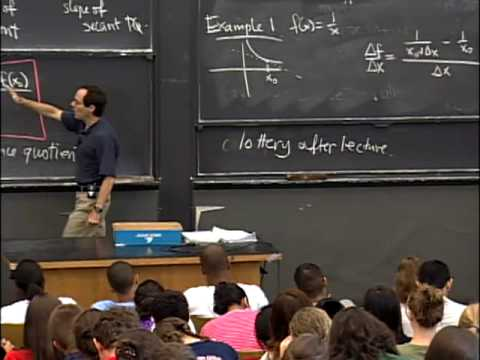

In [17]:
YouTubeVideo('7K1sB05pE0A', start=845, end=1001)

[Accompanying Notes (PDF)](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/1.-differentiation/part-a-definition-and-basic-rules/session-1-introduction-to-derivatives/MIT18_01SCF10_Ses1e.pdf)

OK. Now, This is still a little a little general, and I go, and I wanna work out a more usable form here, I wanna work out a better formula for this.

And in order to do that, I'm gonna write delta f, the numerator more explicitly here. The change in f.

so remember that the point P is the point $(x_0, f(x_0))$ . right, that's what we got for the formula for the point.

And in order to compute these distances and in particular the vertical distance here, I'm gonna have to get a formula for Q as well.

So if this horizontal distance is delta x, then this location is x_0 plus delta x.

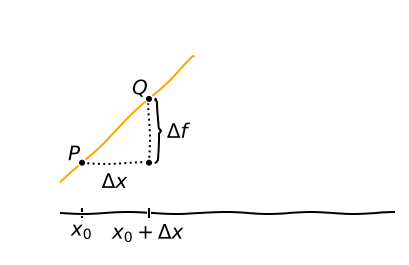

In [18]:
@plot
def draw_x1(ax, x1):
    ax.axhline(c='k')
    ax.plot(x1, 0, 'k|', mew=2)
    ax.text(x1, -0.05, '$x_0 + \Delta x$', ha='center', va='top')

plot.show()

And so the point above that point has a formula, which is x_0 plus i'm sorry plus delta x, f of, and this is a mouthful, x_0 plus delta x.

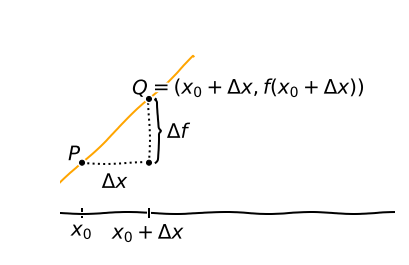

In [19]:
@plot
def draw_q_formula(ax, f, x1):
    ax.text(x1, f(x1), '$ = (x_0 + \Delta x, f(x_0 + \Delta x))$', ha='left', va='bottom')

plot.show()

All right, so there's the formula for the point Q. Here's the formula for the point P.

And now I can write a different formula for the derivative, which is the following:

so this $f'(x_0)$ , which is the same as m, is going to be the limit as delta x goes to 0 of the change in f, well the change in f is the value of f at the upper point here, which is x_0 + delta x, and minus its value at the lower point P, which is f(x_0), divided by delta x.

$$f'(x_0) = \lim_{\Delta x \to 0}\frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}$$

All right, so this is the formula. I'm going to put this in a little box, because this is by far the most important formula today, which we use to derive pretty much everything else. And this is the way that we're going to be able to compute these numbers. 

## Worked Example

* [Problem (PDF)](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/1.-differentiation/part-a-definition-and-basic-rules/session-1-introduction-to-derivatives/MIT18_01SCF10_ex01prb.pdf)
* [Solution (PDF)](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/1.-differentiation/part-a-definition-and-basic-rules/session-1-introduction-to-derivatives/MIT18_01SCF10_ex01sol.pdf)

We’ll use the [Secant Approximation mathlet](https://ocw.mit.edu/ans7870/18/18.01SC/f10/mathlets/secantApproximation.html) to look at a few examples.

In [20]:
def mathlet(fig, pos, title, *args):
    from mpl_toolkits.axisartist.axislines import SubplotZero
    ax = SubplotZero(fig, *pos)
    ax.set_aspect(1)
    fig.add_axes(ax)
    ax.set_xticks(np.linspace(-2.5,2.5,11))

    ax.axis["xzero"].set_visible(True)
    ax.axis["xzero"].toggle(ticklabels=False)

    ax.axis["yzero"].set_visible(True)
    ax.axis["yzero"].toggle(ticklabels=False)
    
    ax.set_ylim(-1.25, 1.25)

    x = np.linspace(-2.5,2.5,100)
    for f in args:
        ax.plot(x, f(x), label=f.__doc__)
    ax.legend()

    ax.set_title(title)

select the function $f(x) = 0.5x^3 − x$.

In [21]:
def f(x):
    '$f(x)=0.5x^3-x$'
    return 0.5*x**3 - x

Use the red and yellow sliders to answer part (a) of each question,

then use the Tangent checkbox to answer part (b).

Be sure to uncheck Tangent before starting the next problem

In [22]:
def draw_part_a(x):
    fig = plt.figure(None, (16,8))
    for i, dx in enumerate([-0.5,-0.25,0.25,0.5]):
        mathlet(fig, (2,2,i+1), fr'$x = {x}, \Delta x = {dx}$', f, secant_line(f, x, x+dx))
    plt.show()
    
def draw_part_b(x):
    fig = plt.figure()
    mathlet(fig, (1,1,1), fr"$x = {x}$", f, tangent_line(f, x))
    plt.show()

def draw_part_c(x, d):
    fig = plt.figure(None, (16,4))
    for i, dx in enumerate([-d, d]):
        mathlet(fig, (1,2,i+1), fr"$x = {x}, \Delta x = {dx}$", f, secant_line(f, x, x+dx))
    plt.show()

### 1. Move the red slider to $x = -0.75$; we’ll investigate the slopes of secant lines passing through the point $(-0.75, f (-0.75))$.

In [23]:
x = -0.75

(a) Use the yellow slider to find the value of $\frac{\Delta y}{\Delta x}$ when $x = -0.75$ and $\Delta x$ has each of the following values:

$$-0.5, -0.25, 0.25, 0.5.$$

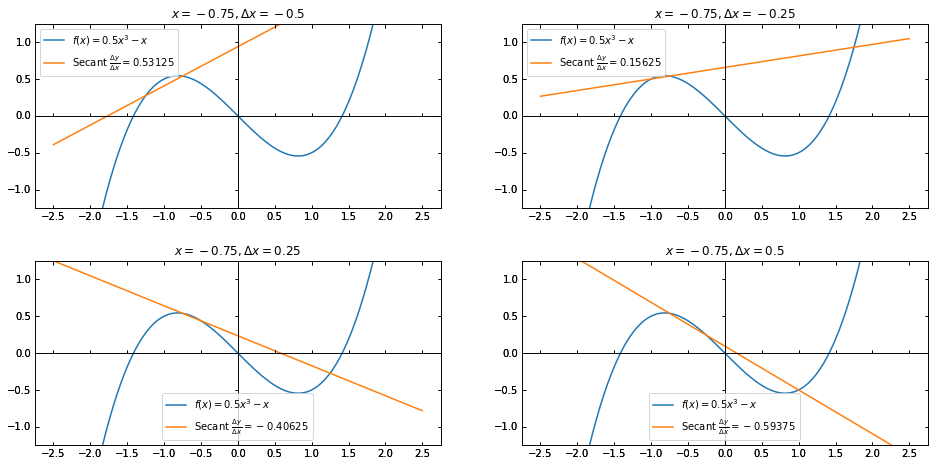

In [24]:
draw_part_a(x)

(b) Use the Tangent checkbox to find the (approximate) slope of the tangent line to the graph of $f(x)$ at $x=-0.75$.

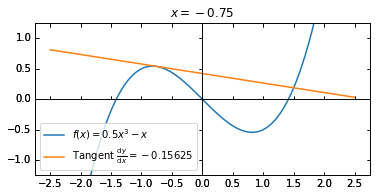

In [25]:
draw_part_b(x)

(c) Find a value of $\Delta x$ for which the value of $\frac{\Delta y}{\Delta x}$ is within $0.1$ units of the slope of the tangent line.

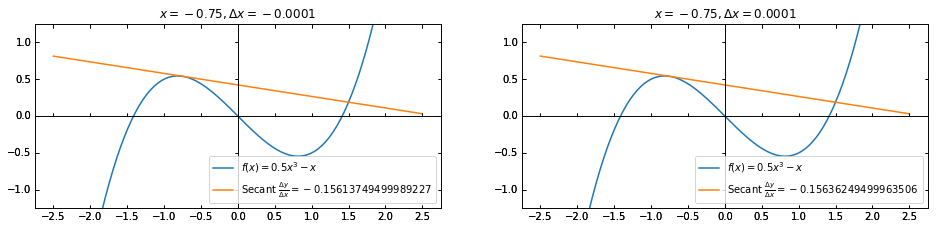

In [26]:
draw_part_c(x, 0.0001)

### 2. Now use the red slider to set $x = 0$.

In [27]:
x = 0

(a) Find $\frac{\Delta y}{\Delta x}$ when $x = 0$ and $\Delta x$ has the values:

$$-0.5, -0.25, 0.25, 0.5.$$

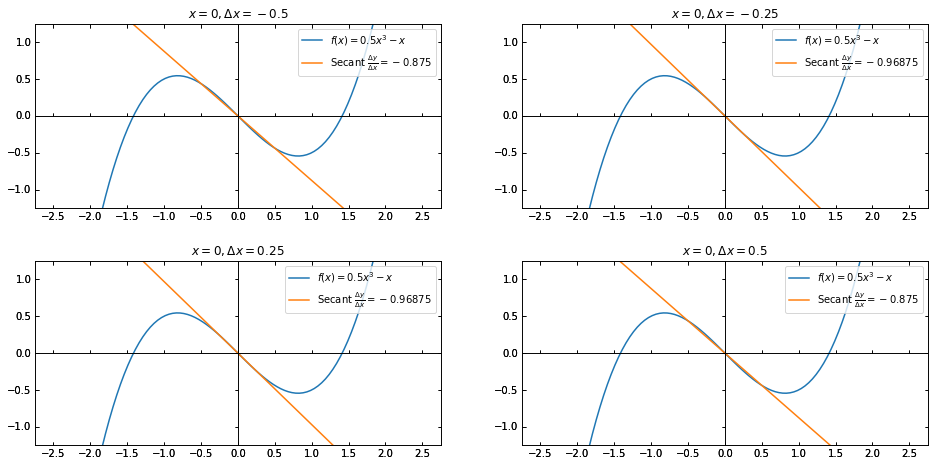

In [28]:
draw_part_a(x)

(b) Find the slope of the tangent line to the graph of $f(x)$ at $x = 0$.

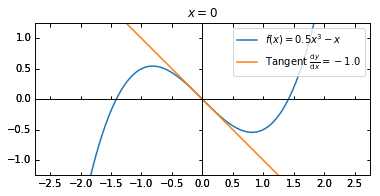

In [29]:
draw_part_b(x)

(c) Find a value of $\Delta x$ for which the value of $\frac{\Delta y}{\Delta x}$ is within $0.1$ units of the slope of the tangent line.

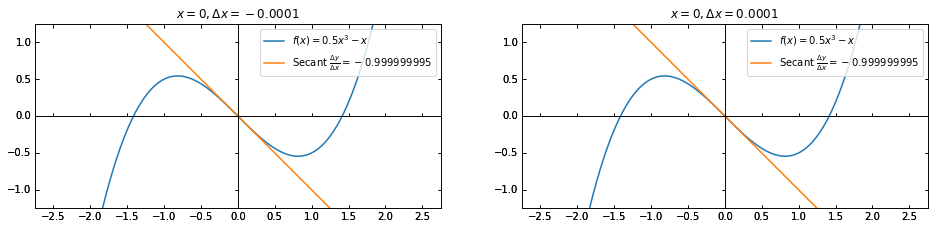

In [30]:
draw_part_c(x, 0.0001)

### 3. Let $x = 0.75$

In [31]:
x = 0.75

(a) Find $\frac{\Delta y}{\Delta x}$ when $x = 0$ and $\Delta x$ has the values:

$$-0.5, -0.25, 0.25, 0.5.$$

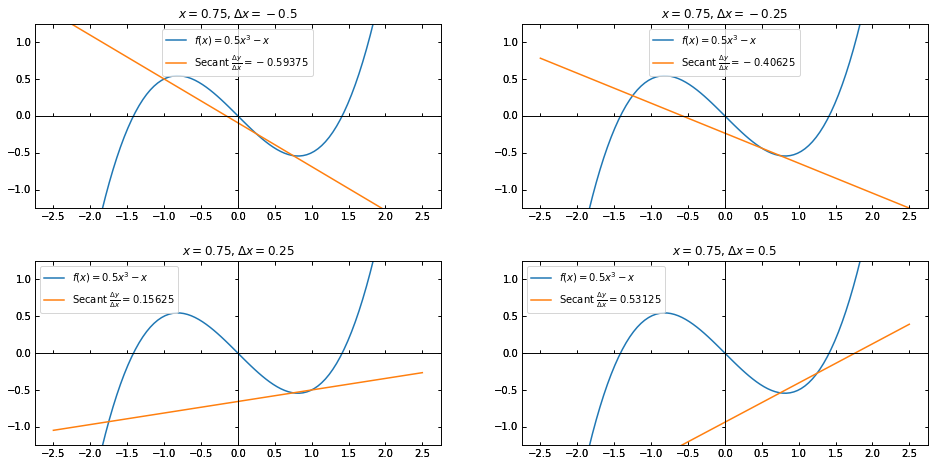

In [32]:
draw_part_a(x)

(b) Find the slope of the tangent line to the graph of $f(x)$ at $x = 0.75$.

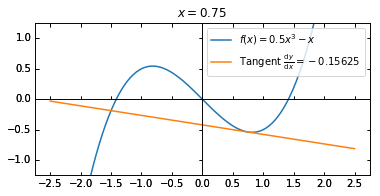

In [33]:
draw_part_b(x)

(c) Find a value of $\Delta x$ for which the value of $\frac{\Delta y}{\Delta x}$ is within $0.1$ units of the slope of the tangent line.

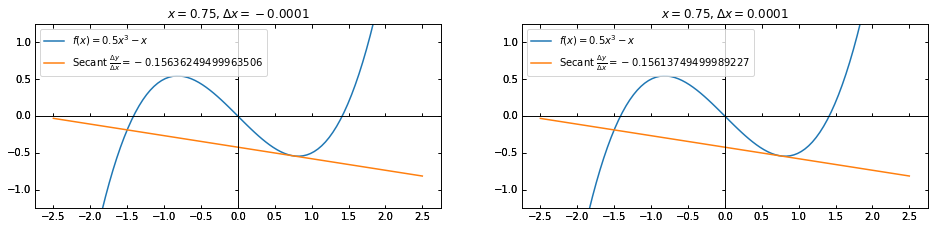

In [34]:
draw_part_c(x, 0.0001)

### 4. Compare your answers to the previous problems.

(a) Was your answer to part (c) the same for each problem?

(b) For some values of $x$, $\frac{\Delta y}{\Delta x}$ was close to the slope of the tangent line when $\Delta x$ was $0.5$. For others it was not. Can you make any conjectures about when you need a very small value of $\Delta x$ in order for $\frac{\Delta y}{\Delta x}$ to be close to the slope of the tangent line?

## Recitation

### Definition of Derivative

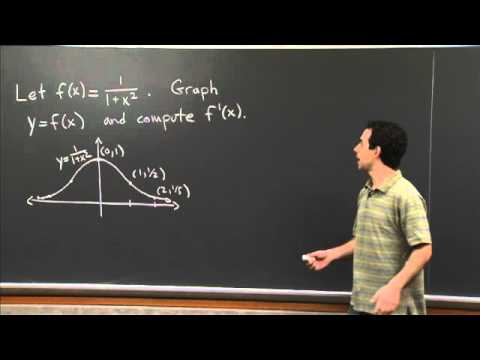

In [35]:
YouTubeVideo('_nbtaQtX6JA')

Hi. Welcome back to recitation. In lecture you've been computing derivatives of functions from the limit definition of derivative. So today we're going to do another example of that and do some graphing, as well.

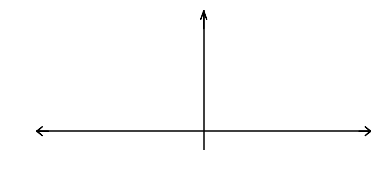

In [36]:
plot = Plot({'font.size': 14})

@plot
def init_ax(ax):
    ax.set_axis_off()
    ax.set_aspect(1.5)
    ax.set_xlim(-2.7,2.7)
    ax.set_ylim(-0.2,1.3)
    ax.axhline(c='k')
    
    style = dict(fc='k', head_width=0.1, head_length=0.1, overhang=0.8)
    
    ax.arrow(-2.5,0,-0.1,0,**style)
    ax.arrow(2.5,0,0.1,0,**style)
    ax.axvline(c='k')
    ax.arrow(0,1.1,0,0.1,**style)

plot.show()

So I've got a problem written here on the board. So we're defining a function f of x to be 1 over the quantity 1 plus x squared. So what I'd like you to do is graph the function of the curve y equals f of x and to compute the derivative f prime of x from the definition.

So why don't you take a couple of minutes to do that yourself, then come back, and we'll work it out together.

**Let $f(x) = \frac{1}{1+x^2}$. Graph $y=f(x)$ and compute $f'(x)$**

In [37]:
def f(x):
    return 1/(1+x**2)

All right. Welcome back. So to start off, let's try graphing this function f of x. So one thing you can always do when you start out graphing a function, is to just plot a few points. And that'll give you a very rough sense of where the function is, at least around those points. 

So, for example, when x is equal to 0 we have f of 0 is 1 over 1. So that's just 1. So we've got this point here, (0, 1).

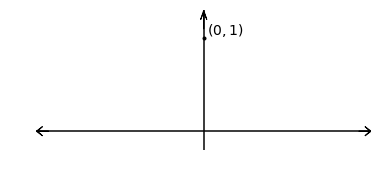

In [38]:
@plot
def draw_p1(ax):
    ax.plot(0, 1, 'k.')
    ax.text(0 + 0.05, 1, '$(0,1)$', va='bottom')

plot.show()

And when x is equal to 1, well, x squared is 1, so the denominator is 2, so the function value is 1/2. So, all right I'm not going to draw this to scale. I'm going to put x equals 1 here. And the function value is 1/2, so this is the point (1, 1/2).

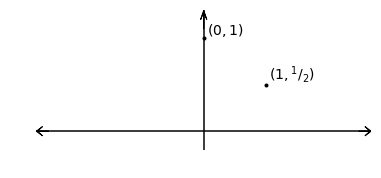

In [39]:
@plot
def draw_p2(ax):
    ax.plot(1, 0.5, 'k.')
    ax.text(1+0.05, 0.5, r'$(1,{}^1/_{2})$', va='bottom')

plot.show()

And, OK. We could do one more. When x is equal to 2, this function-- 2 squared is 4, so that's 5-- so it's 1/5. So I don't know. 1/5 is smaller than 1/2, right? So that's maybe down here-- so this is something like the point (2, 1/5).

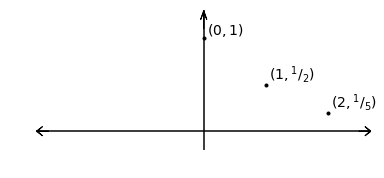

In [40]:
@plot
def draw_p3(ax):
    ax.plot(2, 0.2, 'k.')
    ax.text(2+0.05, 0.2, '$(2,{}^1/_{5})$', va='bottom')

plot.show()

All right. But this is a very rough idea we're getting, so we can use some more sophisticated analysis to get a better idea of what this graph is going to look like.

So the first thing we could notice, for example, is that this is an even function. Right? If I change the sign of x, if I replace x by minus x, well, x squared and minus x squared are both equal to x squared. So if you replace x by minus x, the function value doesn't change. So this is an even function that has symmetry across the axis here.

So, you know, for example, I could just mirror image these points. So these points also have to be on the graph, the points minus 1, 1/2 and minus 2, 1/5. And any other part of the curve that I draw will be perfectly mirror imaged.

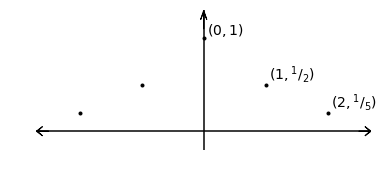

In [41]:
@plot
def draw_p34(ax):
    ax.plot(-1, 0.5, 'k.')
    ax.plot(-2, 0.2, 'k.')

plot.show()

Another thing to observe is that x squared is always greater than or equal to 0. So 1 plus x squared is always positive. So 1 over 1 plus x squared is also always positive.

Also, 1 plus x squared, it reaches its minimum when x is equal to 0 and then as x gets large, either in the positive direction or in the negative direction, this gets larger and larger. This, just the 1 plus x squared part.

So the denominator is getting larger and larger, while the numerator stays constant. The whole fraction gets smaller and smaller. So as x gets bigger, either bigger positive or bigger negative, the function value will diminish off to 0, and it has its maximum value here at 0. Because that's when 1 plus x squared has its minimum.

So the function sort of has its maximum here at 0, and then it flattens out. And as x gets larger and larger and larger, this goes to infinity, so the whole fraction goes down to 0. But it never reaches it, right? Because we said it's always positive. And similarly on the other side.

OK. So that's the graph of the curve y equals 1 over 1 plus x squared. Roughly speaking. OK.

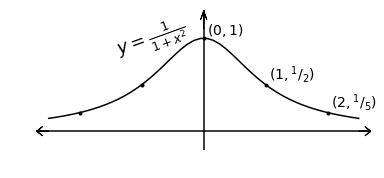

In [42]:
@plot
def draw_curve(ax):
    x = np.linspace(-2.5,2.5,50)
    ax.plot(x, f(x), 'k')
    ax.text(-0.2, 0.7, r'$y = \frac{1}{1+x^2}$',fontsize=18,va='bottom',ha='right',rotation=20)

plot.show()

So now let's talk about computing the derivative. So right now, to compute a derivative, all you have is the limit definition of the derivative. So when I ask you to compute the derivative what you've got to do is write down what that definition says. That's the limit of a difference quotient.

So we have, by definition, that f prime of x is equal to-- well, it's the limit as delta x goes to 0 of some difference quotient. So on the bottom of the difference quotient we just have delta x, and on the top we have f of x plus delta x minus f of x.

$$f'(x) = \lim_{\Delta x \to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Now, In our case, we have a nice formula for f of x.  So this is equal to the limit as delta x goes to 0 of 1 over the quantity 1 plus x plus delta x quantity squared-- oh, I guess I didn't need that parenthesis there-- minus 1 over 1 plus x squared, and the whole thing is over delta x.

$$
= \lim_{\Delta x \to 0} \frac{\frac{1}{1+(x+\Delta x)^2}-\frac{1}{1+x^2}}{\Delta x}
$$

So, what would be really nice, of course, is if this were a limit where we could just plug in the value delta x equals 0 and evaluate it. But the way the definition of a derivative works, that never works, right? You're always left with the numerator. As delta x goes to 0, that top is always going to be f of x minus f of x and it's going to be 0. And the bottom is always going to be delta x going to 0, which is 0.

So you always, when you have a differentiable function, you always have a derivative that's going to be a limit of a 0 over 0 form. So you need to do some sort of manipulation in order to, in order to get into a form you can evaluate it.

What we'd really like is to manipulate this numerator somehow and pull out, say, a factor of delta x. And then that could cancel with the delta x we have in the denominator. Something, some trick like that. Some algebraic or other manipulation to make this into a form where we can plug in and evaluate.

So all right, so right here there's sort of only one manipulation that's natural to do, which is we can add these two fractions together. So let's do that, and we can rewrite this limit. The limit is delta x goes to 0. All right, I'm going to pull this 1 over delta x out front just to make everything look a little bit nicer. It's 1 over delta x times-- OK. I want to, you know, subtract these two fractions. I want to put them over a common denominator, so the denominator is just going to be the product of the denominator. So that's 1 plus x plus delta x quantity squared, times 1 plus x squared. OK. And so this fraction is 1 plus x squared over that denominator. And the second one is 1 plus x plus delta x quantity squared over that common denominator.

$$ = \lim_{\Delta x \to 0}\frac{1}{\Delta x}(\frac{(1+x^2)-(1+(x+\Delta x)^2)}{(1+(x+\Delta x)^2)(1+x^2)})$$

OK. So we still haven't got where we want to be yet because we still have this 1 over delta x hanging out. So OK, so we have to, you know, keep going. And so here, I guess there's a-- this is sort of a problem that forces us a little bit in one direction. You, know, there's not much we can do with the denominator, but here in the numerator we can expand this out and start combining stuff.

So let's do that. So this is equal to-- all right, well, the limit hangs out-- the limit as delta x goes to 0 of 1 over delta x times-- OK, so 1 plus x squared minus-- all right, so if you expand out x plus delta x quantity squared, using your favorite, either FOIL or the binomial theorem or just whatever you like, however you like to multiply two binomials-- so we get a minus 1 minus x squared minus 2x times delta x minus delta x squared. That's the top. OK, and we haven't changed the bottom. It's still 1 plus x plus delta x squared times 1 plus x squared.

$$ = \lim_{\Delta x \to 0}\frac{1}{\Delta x}(\frac{1+x^2-1-x^2-2x\Delta x-{\Delta x}^2}{(1+(x+\Delta x)^2)(1+x^2)})$$

OK. Well, so what? OK, so now some nice stuff is starting to happen, which is this 1 and this minus 1 are going to cancel, and this x squared and this minus x squared are going to cancel. And then after we cancel those terms we see that in the numerator here, everything is going to have a factor of delta x, right? These four are going to cancel, and we'll just be left with these two terms, both of which are divisible by delta x. So that's where this cancellation we've been looking for is going to come from.

So let's keep going. So we cancel those, they subtract, give us 0. This limit is equal to the limit delta x goes to 0-- OK. And then we can divide this delta x from the denominator in, and what we're left with upstairs is minus 2x minus delta x, the whole thing over the same denominator, still. 1 plus x plus delta x squared times 1 plus x squared.

$$ = \lim_{\Delta x \to 0}\frac{-2x-\Delta x}{(1+(x+\Delta x)^2)(1+x^2)}$$

All right. Great. So we've done this manipulation. We finally found a delta x that we could cancel with that delta x we started with in the denominator. And now this limit is no longer this 0 over 0 form, right? When delta x goes to 0, the top goes to minus 2x. And the bottom-- well let's see, this delta x just goes to 0, so it's 1 plus x squared times 1 plus x squared. So that's not 0 over 0. We can just plug in to evaluate. So this is, just works out to a minus 2x over-- OK, 1 plus x squared times 1 plus x squared is 1 plus x squared, quantity squared.

$$= \frac{-2x}{(1+x^2)^2}$$

And so this is the derivative that we were looking for. This is, just to remind you what that was, that's d over dx of 1 over the quantity 1 plus x squared.

$$= \frac{-2x}{(1+x^2)^2} = \frac{\mathrm{d}}{\mathrm{d}x}(\frac{1}{1+x^2})$$

Now, if you wanted, you could check this a little bit by looking at the graph and looking at this function and just making sure that it makes sense. So for example, this function, this derivative has the property that it's 0 when x is 0. And that's the only time it's 0. And if we go back and look at the graph that we drew over here, we see that's also a property that this graph has, right? It has this horizontal tangent line there, and then it diminishes off to the right and it, on the left side it increases, then it has that horizontal tangent line, and then it decreases.

And so if we go back to this function we see, yes indeed, when x is negative, this whole thing is positive. And then at 0 it's 0, and then it's negative thereafter. And similarly, you could note that this function here is an odd function. If you change the sign of x, that changes the sign of this whole expression, and so OK, and so that makes perfect sense back here.

The symmetry of this curve is such that, you know, if we look at a tangent line to the left of 0 and the symmetric tangent line to the right of 0, they're mirror images of each other. So their slopes are exactly negatives of each other. So that's a nice way you can sort of put the two different pieces of this problem together in order to double check your work. So that's that. 

### Graphing a Derivative Function